In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Linear Regression with Gradient Descent

Starting off, make sure you are able to carry out the following operations in Numpy

 $\sum_{i=1}^{n} (x_i+y_i),\sum_{i=1}^{n} x_iy_i, \sum_{i=1}^{n} (x_i-y_i)x_i $

 

In [2]:
x = np.array([1,2,4])
y = np.array([2,3,1])


print(np.sum(x+y))
print(np.sum(x*y))
print(np.sum((x-y)*x))

13
12
9


Now let's jump into a linear regression problem where we will find the best line $$\hat{y}=wx+b$$ to approximate a given set of data points $(x_i,y_i)_{i=1}^{N}$. Idea is to minimize the mean-square cost (MSE) function $$C=\dfrac{1}{N}\sum_{i=1}^{N}\Big(\hat{y}_i-y_i\Big)^2$$
where $\hat{y}_i=wx_i+b$

Please ponder upon the idea behind a loss function. That measures the error made between the predicted value $\hat{y}_i$ and the real value $y_i$ at each data point $x_i$, sum them up and take the average.

Using chain rule, we can see that $$\dfrac{\partial C}{\partial w} = \dfrac{1}{N}\sum_{i=1}^{N}2\Big(\hat{y}_i-y_i\Big)x_i$$, $$ \dfrac{\partial C}{\partial b} = \dfrac{1}{N}\sum_{i=1}^{N}2\Big(\hat{y}_i-y_i\Big)1$$
Now we can go ahead and write the gradient decent for this problem. 

\begin{align}
    \begin{bmatrix}
           w_{n+1} \\
           b_{n+1} \\
     \end{bmatrix} =
     \begin{bmatrix}
           w_{n} \\
           b_{n} \\
      \end{bmatrix} -
      r\begin{bmatrix}
           \dfrac{\partial C}{\partial w} \\
          \dfrac{\partial C}{\partial b} \\
      \end{bmatrix}
\end{align}


Note that all of these can be done in one shot using several modules but it is important to see the machinary behind it. In machine learning jargon, we say **w: weight, b: bias**. These are learnable parameters. Lets do a single step gradient decent first.


In [3]:
x = np.array([1,2,4,5])    #sample input
y = np.array([4,8,16,20])  #sample output
n = x.shape[0]               
w0 = 0.                 #initial guess for weight
b0 = 0.                 #initial guess for bias
r = 0.01;               #learing rate
y_pred = w0 * x + b0    #get the prediction
gradw =  1/n*np.sum( 2*(y_pred-y)*x )
gradb = 1/n*np.sum( 2*(y_pred-y) )
w1 = w0 - r *gradw   #update w0
b1 = b0 - r * gradb    #update b0
print(w1,b1)

0.92 0.24


- Let's generate a test data in a way that the output values is on the line $y = 7x+2$. Thus, if gradient decent works,we should get $w \approx 7,b\approx 2$.

In [4]:
#generate N random points
N = 100
x = np.random.rand(N)        
y = 7*x + 2    
num_epochs = 200;
lr = 0.1;
w = 0.
b = 0.
for i in range(num_epochs):
    y_pred = w * x + b
    w_der = (1/N)*np.sum(2*(y_pred-y)*x)
    b_der = (1/N)*np.sum(2*(y_pred-y))
    w = w - lr * w_der
    b = b - lr * b_der
    if i%20==0:
      print(f'w={w:0.2f}, b={b:0.2f}')

w=0.66, b=1.10
w=3.44, b=3.90
w=4.22, b=3.49
w=4.82, b=3.17
w=5.30, b=2.91
w=5.67, b=2.71
w=5.96, b=2.56
w=6.19, b=2.44
w=6.36, b=2.34
w=6.50, b=2.27


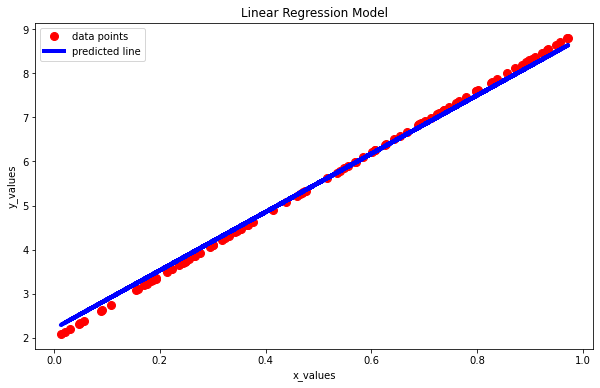

In [5]:
y_preds = w*x+b
plt.figure(figsize=(10,6))
plt.plot(x,y,'ro',markersize = 8)
plt.plot(x,y_preds,'b',linewidth=4)
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.title('Linear Regression Model')
plt.legend(['data points','predicted line'])
plt.show()

- Now let's plot $w$ vs $b$ to see where it approaches

- Notice that we use the entire data all at once. This approach is called **Batch Gradient Decent**. In realistic problems, this approach is not feasible due to hardware constraints. 

- Another approach would be to pick one data point and update the parameters. This is called **Stochastic Gradient Decent**. This approach would be very fast but the parameters would bounce around wildly and may never settle in local minima.  

- The most common approach is to grab some portion of the data and update the parameters in each epoch. This is called **Mini-Batch Gradient Decent**. All these terms however are used interchangeably. The following figure summarizes the common characteristics of these approaches.

- Your homework would be to implement *Stochastic Gradient Decent* and *Mini-Batch Gradient Decent*


![gradient.png](data/gradient.png)

## Linear Regression on Max-Min Temperature Data
Firs of all, lets convert our gradient decent and plotting codes to a function. This is a very common practice in any coding project. First, make sure the code is working, then deploy it as a function, class etc. At this stage, we are just interested in end results. Also let's check the error curve as well. 

In [6]:
def FitLinearRegression(x,y,num_epochs = 100,lr = 0.01):
    """
    x: inputs, y: targets
    """
    #number of samples
    N = x.shape[0]
    
    #initial guess for w and b
    w,b = 0,0
    mse = []
    for epoch in range(num_epochs):
        #get prediction
        y_pred = w * x + b
        
        # gradient with respect to w and b
        w_der = (1/N)*np.sum(2*(y_pred-y)*x)  
        b_der = (1/N)*np.sum(2*(y_pred-y))
        
        #update w and b
        w = w - lr * w_der                    
        b = w - lr * b_der
        
        #save mean-square-error
        mse.append(1/N * np.sum((y_pred - y)**2))

    return w, b, mse


In [7]:
def PlotResults(x,y,w,b):
    y_preds = w*x+b
    plt.plot(x,y_preds,'-b',x,y,'ro',markersize = 1)
    plt.xlabel('x_values')
    plt.ylabel('y_values')
    plt.title('Linear Regression Model')
    plt.legend(['predicted','real_values'])
    plt.show()

In [8]:
def PlotError(error, num_epochs):
    epoch = np.arange(num_epochs)
    plt.plot(epoch,error,'-b')
    plt.xlabel('epoch')
    plt.ylabel('MSE Error')
    plt.title('Error Curve')
    plt.show()

- Now let's work on a real data-set. This dataset concerns the minimum and maximum temprature recorded in a couple of years period. The data format is "*csv" (comma seperated version). 
- We would like to train a linear regression model to fit this dataset. We would like to predict the max temprature from minimum temprature.

In [9]:
temprature_dir = "data/max_min_temp.csv"
df = pd.read_csv(temprature_dir)
df.head()

,MinTemp,MaxTemp
0,22.222222,25.555556
1,21.666667,28.888889
2,22.222222,26.111111
3,22.222222,26.666667
4,21.666667,26.666667


In [10]:
df.describe()

,MinTemp,MaxTemp
count,119040.000000,119040.000000
mean,17.789511,27.045111
std,8.334572,8.717817
min,-38.333333,-33.333333
25%,15.000000,25.555556
50%,21.111111,29.444444
75%,23.333333,31.666667
max,34.444444,50.000000


- In reality, we should **NOT** train the model on the entire dataset. So, we will split the data into training and testing parts. Idea is to train the model on training data set then test the quality of the model on the testing data set. 

- Usually, we split the data as 80% training and 20% testing. Train-test split is a **MUST** process in supervised machine learning.

In [11]:
train_set = df.sample(frac = 0.8)     # training dataset
test_set  = df.drop(train_set.index)  # testing dataset

In [12]:
print(len(train_set))
print(len(test_set))

95232
23808


In [13]:
#train inputs and ouputs
x_train = train_set['MinTemp']
y_train = train_set['MaxTemp']

#test inputs and outputs
x_test = test_set['MinTemp']
y_test = test_set['MaxTemp']

In [14]:
num_epochs = 50
lr = 0.001
w, b, error = FitLinearRegression(x_train,y_train,num_epochs,lr)
print(f'w:{w:0.6f} b:{b:0.6f}')

w:1.349506 b:1.352863


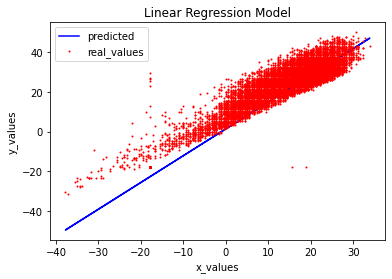

In [15]:
#carefully note that we display the test data vs predicted line
PlotResults(x_test,y_test,w,b)

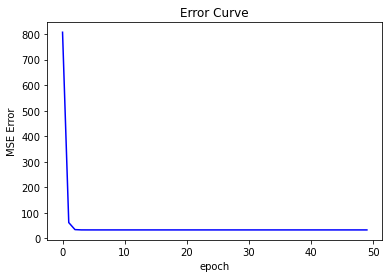

In [16]:
PlotError(error, num_epochs)

- As we can see from MSE curve, the error does not change significantly after 20 epochs. Thus, training the model with 50 epochs is not an optimal choice. The better idea would identify the optimal epoch number and run the model only for say 5 epochs rather than 20. 


- In many modern machine libraries have a functionality to detect the slowdown in the error cuve so that we can stop the training early. This is called **"early stopping"**. This is so important in realistic applications. Imagine every epoch takes 20 hours and cost \$50...

# Final Remarks

- For linear regression problems, the loss function can be represented by a simple paraboloid type shape for which we always have a global minimum.

- We will discuss neural networks in the next section. Finding the best optimization strategy for neural networks is an active research field. Just to give an idea about what kind of loss function surface we may have, inspect the surface below. [Credit](https://www.cs.umd.edu/~tomg/projects/landscapes/)


![gradient.png](data/vgg.png)

- In a typical problem, we have tens of parameters to be tuned, model architecture, learning rate, number of epochs, batch size, bunch of regularization parameters etc. etc. 

- Watch this [Loss Landscape Explorer 1.1](https://youtu.be/As9rW6wtrYk)